In [ ]:
%matplotlib inline

In [425]:
import stats_enriched_tweets
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from mpltools import style
import numpy as np
from collections import Counter, OrderedDict
import pandas as pd
import plotly.plotly as py
import codecs
import json

filename_pre = "/home/muntean/brexit-enriched/all-brexit-with-sent_pre-lines.json"
filename_post = "/home/muntean/brexit-enriched/all-brexit-with-sent_post-lines.json"

In [423]:
def tweetIter(inputfile):
    """
    Iterates a JSON file containing enriches tweets
    :param inputfile: the file to iterate over
    :return:
    """
    for line in codecs.open(inputfile, "r", "utf-8"):
        tweet = json.loads(line)
        yield tweet

# build all dicts while reading

In [ ]:
# 1. PRE and POST
# Given a file (PRE or POST): 
#    - we need daily volumes 
#    - we need country volumes

pre_tweetIndex = stats_enriched_tweets.createTweetIndex(filename_pre)
print len(pre_tweetIndex)

post_tweetIndex = stats_enriched_tweets.createTweetIndex(filename_post)
print len(post_tweetIndex)

In [ ]:
# 2. masks over tweet index pre
print "PRE brexit"
pre_dailyTweetsDict = stats_enriched_tweets.createDailyTweetsMask(pre_tweetIndex)
print "Daily tweets - volumes:", len(pre_dailyTweetsDict)
pre_userCountryTweetsDict = stats_enriched_tweets.createUserCountryTweetsMask(pre_tweetIndex)
print "User country tweets - volumes - EU:", len(pre_userCountryTweetsDict)


In [ ]:
for k,v in pre_dailyTweetsDict.iteritems():
    print k, len(v)

In [ ]:
for k,v in pre_userCountryTweetsDict.iteritems():
    print k, len(v)

In [ ]:
# 2. masks over tweet index post
print "POST brexit"
post_dailyTweetsDict = stats_enriched_tweets.createDailyTweetsMask(post_tweetIndex)
print "Daily tweets - volumes:", len(post_dailyTweetsDict)

In [ ]:
post_userCountryTweetsDict = stats_enriched_tweets.createUserCountryTweetsMask(post_tweetIndex)
print "User country tweets - volumes - EU:", len(post_userCountryTweetsDict)

In [ ]:
for k,v in post_dailyTweetsDict.iteritems():
    print k, len(v)

In [ ]:
for k,v in post_userCountryTweetsDict.iteritems():
    print k, len(v)

# plot types

In [ ]:
font = FontProperties()
families = ['serif', 'sans-serif', 'cursive', 'fantasy', 'monospace']
font.set_family(families[0])

In [ ]:
def plotBarWithLables(distrib, labels, title, rot=0):
    style.use('ggplot')
    plt.figure()
    ind = np.arange(len(distrib))
    the_plot = plt.bar(ind, distrib, width = 0.75, align='center', color='k', log=True, fontproperties=font)
    the_plot[5].set_color('r')
    plt.xticks(ind, labels, rotation=rot, fontsize = 10)
    plt.title(title, fontsize = 10)
    plt.ylabel('Number of tweets', fontsize = 10)
    plt.tight_layout()
    plt.xlim(xmin=-1, xmax=17)
#     plt.ylim(ymax=75000)
    plt.savefig("/home/muntean/brexit-enriched/plots/" + title.replace(" ","_") + ".pdf")
    plt.show()

In [ ]:
def plotBarWithLables2Distrib(a,b, labels, title, rot=0):

    #style.use('ggplot')
    ind = np.arange(len(a))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, a, width, color='k', log=True)
    rects2 = ax.bar(ind + width, b, width, color='w', edgecolor='k', log=True)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Number of tweets')
#     ax.set_title(title)
    ax.set_xticks(ind + width)
    
    ax.set_xticklabels(labels)

    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

    ax.legend((rects1[0], rects2[0]), ('Pre-Brexit', 'Post-Brexit'), loc='upper right')
    
#     def autolabel(rects):
#         # attach some text labels
#         for rect in rects:
#             height = rect.get_height()
#             ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height,
#                     '%d' % int(height),
#                     ha='center', va='bottom')
    
#     autolabel(rects1)
#     autolabel(rects2)

#     plt.tight_layout()
    plt.savefig("/home/muntean/brexit-enriched/plots/"+ title.replace(" ","_") + ".pdf")
    plt.show()

In [446]:
def plotBarWithLables2DistribSenti(a,b, labels, title, rot=0):
    # a,b ->  against, pro
    
    
    #style.use('ggplot')
    ind = np.arange(len(a))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, a, width, color='y', log=True)
    rects2 = ax.bar(ind + width, b, width, color='r', edgecolor='k', log=True)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Number of tweets')
#     ax.set_title(title)
    ax.set_xticks(ind + width)
    
    ax.set_xticklabels(labels)

    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

    ax.legend((rects1[0], rects2[0]), ('Against Brexit', 'Pro Brexit'), loc='upper right')
    
#     def autolabel(rects):
#         # attach some text labels
#         for rect in rects:
#             height = rect.get_height()
#             ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height,
#                     '%d' % int(height),
#                     ha='center', va='bottom')
    
#     autolabel(rects1)
#     autolabel(rects2)

#     plt.tight_layout()
    plt.savefig("/home/muntean/brexit-enriched/plots/"+ title.replace(" ","_") + ".pdf")
    plt.show()

In [ ]:
#### plot RED, YELLOW

def plot2ColorLines(distributionsDict, variableNames, plotname):
    
    lineNames = sorted(variableNames) # 20 countries
    ind = range(len(lineNames)) # 0:19
    days = dailyMentionDict.keys() # 0:29
    
    fig = plt.figure()
    ax = plt.axes()

#     x = np.linspace(0, 10, 1000)
    ax.plot(y1, "y-");
    ax.plot(y2, "r-");
    

In [266]:
#### line plots
def plotLines(dailyMentionDict, variables, plotname):
    
    # http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
    # Now that the plot is prepared, it's time to actually plot the data!    
    # Note that I plotted the majors in order of the highest % in the final year.    
#     majors = ['Syria', 'Iran', 'United Kingdom', 'Iraq',    
#               'Germany', 'Hungary', 'Israel',    
#               'Ivory Coast', 'Russia', 'Nigeria',    
#               'Turkey', 'Yemen', 'India',    
#               'France', 'Greece', 'Libya',    
#               'Austria', 'Italy', 'China', 'Lebanon'] 

#     majors = ["Croatia", "Hungary", "Austria", "Germany", "Serbia", "Macedonia", "Greece", "United Kingdom"]
    
    majors_alpha = sorted(variables) # 20 countries
    ind = range(len(majors_alpha)) # 0:19
    days = dailyMentionDict.keys() # 0:29

  
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    

    # You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
    # exception because of the number of lines being plotted on it.    
    # Common sizes: (10, 7.5) and (12, 9)    
    country_lines = plt.figure()#figsize=(12, 14))    

    # Remove the plot frame lines. They are unnecessary chartjunk.    
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()    

#     Limit the range of the plot to only where the data is.    
#     Avoid unnecessary whitespace.    
#     plt.ylim(10, 1000)    
#     plt.xlim(-1, 6)    

    # Make sure your axis ticks are large enough to be easily read.    
    # You don't want your viewers squinting to read your plot.    
#     plt.yticks(range(0, 13000, 1000), [str(x) for x in range(0, 13000, 1000)], fontsize=10)  
    new_days = [str(x)[4:6]+"-"+str(x)[6:] for x in days]
    plt.xticks(range(30), new_days, fontsize=10, rotation=90)
    
    ### devo iterare il dizionario in modo verticale
    for rank, mention in enumerate(variables):           
        mentionValues = list()
        for day in days:
            mentionsFreq = {x : y for [x, y] in dailyMentionDict[day]}
            mentionValues.append(0 if mention not in mentionsFreq else mentionsFreq[mention])
        
        data = np.array(mentionValues)
        print data

        plt.plot(range(len(data)), data,lw=2.5, color=tableau20[rank], label = " ".join([x.capitalize() for x in mention.split()]))  
        
#     plt.legend(loc='upper left')
#     plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True, shadow=True)
    lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
    plt.ylabel("Number of tweets")
    plt.savefig(plotname,  bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [403]:
#### line plots
def plotLinesWithGap(dailyMentionDict, variables, plotname):
    
    # http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
    # Now that the plot is prepared, it's time to actually plot the data!    
    # Note that I plotted the majors in order of the highest % in the final year.    
#     majors = ['Syria', 'Iran', 'United Kingdom', 'Iraq',    
#               'Germany', 'Hungary', 'Israel',    
#               'Ivory Coast', 'Russia', 'Nigeria',    
#               'Turkey', 'Yemen', 'India',    
#               'France', 'Greece', 'Libya',    
#               'Austria', 'Italy', 'China', 'Lebanon'] 

#     majors = ["Croatia", "Hungary", "Austria", "Germany", "Serbia", "Macedonia", "Greece", "United Kingdom"]
    
    majors_alpha = sorted(variables) # 20 countries
    ind = range(len(majors_alpha)) # 0:19
    days = dailyMentionDict.keys() # 0:29

  
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    

    # You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
    # exception because of the number of lines being plotted on it.    
    # Common sizes: (10, 7.5) and (12, 9)    
    country_lines = plt.figure()#figsize=(12, 14))    

    # Remove the plot frame lines. They are unnecessary chartjunk.    
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()    

#     Limit the range of the plot to only where the data is.    
#     Avoid unnecessary whitespace.    
#     plt.ylim(10, 1000)    
#     plt.xlim(-1, 6)    

    # Make sure your axis ticks are large enough to be easily read.    
    # You don't want your viewers squinting to read your plot.    
#     plt.yticks(range(0, 13000, 1000), [str(x) for x in range(0, 13000, 1000)], fontsize=10)  
    new_days = [str(x)[4:6]+"-"+str(x)[6:] for x in days]
    plt.xticks(range(30), new_days, fontsize=10, rotation=90)
    
    ### devo iterare il dizionario in modo verticale
    for rank, mention in enumerate(variables):           
        mentionValues = list()
        for day in days:
            mentionsFreq = {x : y for [x, y] in dailyMentionDict[day]}
            mentionValues.append(0 if mention not in mentionsFreq else mentionsFreq[mention])
        
        data = np.array(mentionValues)
        print data

#         plt.plot(range(len(data)), data,lw=2.5, color=tableau20[rank], label = " ".join([x.capitalize() for x in mention.split()])) 
        plt.plot(range(5), data[:5],lw=2.5, color=tableau20[rank], marker='o',label = " ".join([x.capitalize() for x in mention.split()]))  
        plt.plot(range(5,len(data)), data[5:],lw=2.5, color=tableau20[rank], marker='o') #, label = " ".join([x.capitalize() for x in mention.split()]))  
        
#     plt.legend(loc='upper left')
#     plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True, shadow=True)
    lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
    plt.ylabel("Number of mentions")
    plt.savefig(plotname,  bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [332]:
#### line plots
def plotLinesRedYellow(dailyMentionDict, variables, plotname):
    
    majors_alpha = sorted(variables) # 20 countries
    ind = range(len(majors_alpha)) # 0:19
    days = dailyMentionDict.keys() # 0:29
   

    # You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
    # exception because of the number of lines being plotted on it.    
    # Common sizes: (10, 7.5) and (12, 9)    
    country_lines = plt.figure()#figsize=(12, 14))    

    # Remove the plot frame lines. They are unnecessary chartjunk.    
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()    

#     Limit the range of the plot to only where the data is.    
#     Avoid unnecessary whitespace.    
#     plt.ylim(10, 1000)    
#     plt.xlim(-1, 6)    

    # Make sure your axis ticks are large enough to be easily read.    
    # You don't want your viewers squinting to read your plot.    
#     plt.yticks(range(0, 13000, 1000), [str(x) for x in range(0, 13000, 1000)], fontsize=10)  
    new_days = [str(x)[4:6]+"-"+str(x)[6:] for x in days]
    plt.xticks(range(30), new_days, fontsize=10, rotation=90)
    
    ### devo iterare il dizionario in modo verticale
    for rank, mention in enumerate(variables):           
        mentionValues = list()
        for day in days:
            mentionsFreq = {x : y for [x, y] in dailyMentionDict[day]}
            mentionValues.append(0 if mention not in mentionsFreq else mentionsFreq[mention])
        
        data = np.array(mentionValues)
        print data
        
        if mention == "against_seed":
            plt.plot(range(len(data)), data,lw=2.5, color="y", label = " ".join([x.capitalize() for x in mention.split()]))
        if mention == "pro_seed":
            plt.plot(range(len(data)), data,lw=2.5, color="r", label = " ".join([x.capitalize() for x in mention.split()]))
        if mention == "against_final":
            plt.plot(range(len(data)), data,lw=2.5, color="y", linestyle="--", label = " ".join([x.capitalize() for x in mention.split()]))
        if mention == "pro_final":
            plt.plot(range(len(data)), data,lw=2.5, color="r", linestyle="--", label = " ".join([x.capitalize() for x in mention.split()]))

        
#     plt.legend(loc='upper left')
#     plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True, shadow=True)
    lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
    plt.ylabel("Number of hashtags mentions")
    plt.savefig(plotname,  bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [377]:
#### line plots
def plotLinesRedYellow4Lines(dailyMentionDict1, variables1, dailyMentionDict2, variables2, plotname):
    
    majors_alpha = sorted(variables1.union(variables2)) # 20 countries
    print majors_alpha
    ind = range(len(majors_alpha)) # 0:19
    days = dailyMentionDict1.keys() # 0:29
   

    # You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
    # exception because of the number of lines being plotted on it.    
    # Common sizes: (10, 7.5) and (12, 9)    
    country_lines = plt.figure()#figsize=(12, 14))    

    # Remove the plot frame lines. They are unnecessary chartjunk.    
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()    

#     Limit the range of the plot to only where the data is.    
#     Avoid unnecessary whitespace.    
#     plt.ylim(10, 1000)    
#     plt.xlim(-1, 6)    

    # Make sure your axis ticks are large enough to be easily read.    
    # You don't want your viewers squinting to read your plot.    
#     plt.yticks(range(0, 13000, 1000), [str(x) for x in range(0, 13000, 1000)], fontsize=10)  
    new_days = [str(x)[4:6]+"-"+str(x)[6:] for x in days]
    plt.xticks(range(30), new_days, fontsize=10, rotation=90)
    
    ### devo iterare il dizionario1 in modo verticale
    for rank, mention in enumerate(variables1):              
        mentionValues = list()
        for day in days:
            mentionsFreq = {x : y for [x, y] in dailyMentionDict1[day]}
            mentionValues.append(0 if mention not in mentionsFreq else mentionsFreq[mention])
        
        data = np.array(mentionValues)
        print data
        
        if mention == "against_seed":
#             plt.plot(range(len(data)), data,lw=2.5, color="y", label = " ".join([x.capitalize() for x in mention.split()]))
            plt.plot(range(5), data[:5],lw=2.5, color="y", marker="o", label=r'Against Brexit, $\tau_0$' )
            plt.plot(range(5,len(data)), data[5:],lw=2.5, color="y", marker="o") 
        if mention == "pro_seed":
#             plt.plot(range(len(data)), data,lw=2.5, color="r", label = " ".join([x.capitalize() for x in mention.split()]))
            plt.plot(range(5), data[:5],lw=2.5, color="r", marker="o", label=r'Pro Brexit, $\tau_0$' )
            plt.plot(range(5,len(data)), data[5:],lw=2.5, color="r",marker="o") 
        if mention == "against_final":
#             plt.plot(range(len(data)), data,lw=2.5, color="y", linestyle="--", label = " ".join([x.capitalize() for x in mention.split()]))
            plt.plot(range(5), data[:5],lw=2.5, color="y", linestyle="--",marker="s", label=r'Against Brexit, $\tau_final$' )
            plt.plot(range(5,len(data)), data[5:],lw=2.5, color="y", linestyle="--", marker="s") 
        if mention == "pro_final":
#             plt.plot(range(len(data)), data,lw=2.5, color="r", linestyle="--", label = " ".join([x.capitalize() for x in mention.split()]))
            plt.plot(range(5), data[:5],lw=2.5, color="r", linestyle="--", marker="s", label=r'Pro Brexit, $\tau_final$' )
            plt.plot(range(5,len(data)), data[5:],lw=2.5, color="r", linestyle="--",marker="s" )
            
    ### devo iterare il dizionario2 in modo verticale
    sortedvar2 = sorted(variables2, reverse=True)
    for rank, mention in enumerate(sortedvar2):           
        mentionValues = list()
        for day in days:
            mentionsFreq = {x : y for [x, y] in dailyMentionDict2[day]}
            mentionValues.append(0 if mention not in mentionsFreq else mentionsFreq[mention])
        
        data = np.array(mentionValues)
        print data
        
        if mention == "against_seed":
#             plt.plot(range(len(data)), data,lw=2.5, color="y", label = " ".join([x.capitalize() for x in mention.split()]))
            plt.plot(range(5), data[:5],lw=2.5, color="y", marker="o", label=r'Against Brexit, $\tau_0$' )
            plt.plot(range(5,len(data)), data[5:],lw=2.5, color="y", marker="o") 
        if mention == "pro_seed":
#             plt.plot(range(len(data)), data,lw=2.5, color="r", label = " ".join([x.capitalize() for x in mention.split()]))
            plt.plot(range(5), data[:5],lw=2.5, color="r", marker="o", label=r'Pro Brexit, $\tau_0$' )
            plt.plot(range(5,len(data)), data[5:],lw=2.5, color="r",marker="o") 
        if mention == "against_final":
#             plt.plot(range(len(data)), data,lw=2.5, color="y", linestyle="--", label = " ".join([x.capitalize() for x in mention.split()]))
            plt.plot(range(5), data[:5],lw=2.5, color="y", linestyle="--",marker="s", label=r'Against Brexit, $\tau_{final}$' )
            plt.plot(range(5,len(data)), data[5:],lw=2.5, color="y", linestyle="--", marker="s") 
        if mention == "pro_final":
#             plt.plot(range(len(data)), data,lw=2.5, color="r", linestyle="--", label = " ".join([x.capitalize() for x in mention.split()]))
            plt.plot(range(5), data[:5],lw=2.5, color="r", linestyle="--", marker="s", label=r'Pro Brexit, $\tau_{final}$' )
            plt.plot(range(5,len(data)), data[5:],lw=2.5, color="r", linestyle="--",marker="s" )
        
#     plt.legend(loc='upper left')
#     plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True, shadow=True)
#     lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
    lgd = plt.legend(loc='upper right', fancybox=True, shadow=True)
    plt.ylabel("Number of hashtags mentions")
    plt.savefig(plotname,  bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

# plots literally

#### tweets per day

In [263]:
def plotTweetsPerDay(tweetsPerDayDict1, tweetsPerDayDict2):
    tweetsPerDay1 = [[len(y), x] for x, y in tweetsPerDayDict1.items() if x is not None and len(y)>20000]
    tweetsPerDay2 = [[len(y), x] for x, y in tweetsPerDayDict2.items() if x is not None and len(y)>20000]
    print tweetsPerDay1
    print tweetsPerDay2
    
    tweetsPerDay = tweetsPerDay1 + [[288091, 20160623]] + tweetsPerDay2
    print tweetsPerDay
    
    tweetsPerDay.sort(key = lambda row: row[1])
    #print tweetsPerDay
    print "Tweets per day", len(tweetsPerDay)
    
    values = list(zip(*tweetsPerDay)[0])
    #print values
    labels = list(zip(*tweetsPerDay)[1])
    new_labels = [str(x)[4:6]+"-"+str(x)[6:] for x in labels]
    print new_labels
    #print labels
    plotBarWithLables(values, new_labels, "Number of tweets per day", rot=90)

[[23677, 20160618], [33389, 20160619], [49577, 20160620], [55435, 20160621], [69550, 20160622]]
[[42564, 20160704], [331895, 20160624], [84164, 20160625], [91813, 20160626], [130235, 20160627], [84284, 20160628], [61895, 20160629], [38694, 20160630], [39825, 20160701], [31806, 20160702], [30869, 20160703]]
[[23677, 20160618], [33389, 20160619], [49577, 20160620], [55435, 20160621], [69550, 20160622], [288091, 20160623], [42564, 20160704], [331895, 20160624], [84164, 20160625], [91813, 20160626], [130235, 20160627], [84284, 20160628], [61895, 20160629], [38694, 20160630], [39825, 20160701], [31806, 20160702], [30869, 20160703]]
Tweets per day 17
['06-18', '06-19', '06-20', '06-21', '06-22', '06-23', '06-24', '06-25', '06-26', '06-27', '06-28', '06-29', '06-30', '07-01', '07-02', '07-03', '07-04']


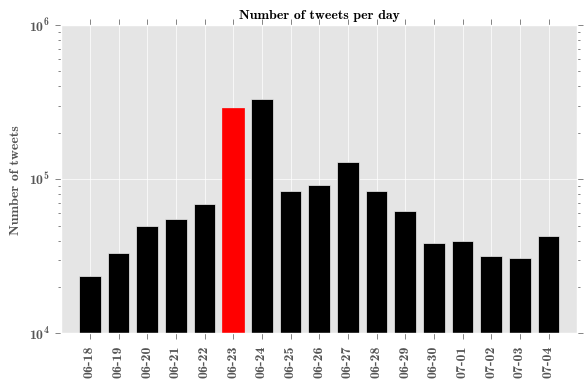

In [264]:
plotTweetsPerDay(pre_dailyTweetsDict, post_dailyTweetsDict)

#### tweets per country

In [ ]:
import numpy
def plotTweetsPerCountryPrePost(pre_tweetsPerCountryDict, post_tweetsPerCountryDict):
    
    pre_tweetsPerCountry = [[len(y), x] for x, y in pre_tweetsPerCountryDict.items() if x is not None]
    post_tweetsPerCountry = [[len(y), x] for x, y in post_tweetsPerCountryDict.items() if x is not None]
    
    print pre_tweetsPerCountry
    
    #sum countries
    countryDict = defaultdict()
    for item in pre_tweetsPerCountry:
        countryDict[item[1]] = item[0] 
    for item in post_tweetsPerCountry:
        if item[1] in countryDict:
            countryDict[item[1]] += item[0]
        
    countryDictSorted = sorted(countryDict.iteritems(), key=lambda x: x[1], reverse=True)  # order by frequency
    print countryDictSorted
    
    
    labels = [x for [x,y] in countryDictSorted[:20]]
    print labels

    
    pre_freq = list()
    pre_countries = {y : x for [x,y] in pre_tweetsPerCountry}
    for country in labels:
        pre_freq.append(pre_countries[country])
    print pre_freq
    
    post_freq = list()
    post_countries = {y : x for [x,y] in post_tweetsPerCountry}
    for country in labels:
        post_freq.append(post_countries[country])
    print post_freq

    labels[0] = u"UK"  # ok????
    print labels
    plotBarWithLables2Distrib(pre_freq, post_freq, labels, "tweets_per_Country_pre_post_log_scale", rot=90)
#     plotBarWithLables2Distrib(pre_freq, post_freq, labels, "tweets_per_Country_pre_post", rot=90)

In [ ]:
plotTweetsPerCountryPrePost(pre_userCountryTweetsDict, post_userCountryTweetsDict)

In [ ]:
def top20countryMentions(dailyTweetsDict, tweetIndex):   
    # order chrono
    sortedDailyTweetsDict = sorted(x for x,k in dailyTweetsDict.iteritems() if len(k)>20000)
    # print len(sortedDailyTweetsDict)
    
    countryMentions = list()
    for day, tweetList in dailyTweetsDict.iteritems():
        if day in sortedDailyTweetsDict:
            for tweet_id in tweetList:
                mentions = tweetIndex[tweet_id]["ht"]  #list
                for mention in mentions:
                    countryMentions.append(mention)
    #topCountryMentions = Counter(countryMentions).most_common(20)
    topCountryMentions = Counter(countryMentions).most_common()
    
    return topCountryMentions

In [380]:
### be aware of the difference between MENTIONS IN TEXT and HASHTAGS IN HASHTAG LIST

# politicians = ["david cameron", "theresa may", "nigel farage", "boris johnson", "david davis", "joe cox", 
#                "jeremy corbyn", "george osborne", "nicola sturgeon"]

politician_ht = ["jocox", "jocoxmp", "davidcameron", "cameron", "farage", "borisjohnson", "corbyn",
                 "sturgeon", "keepcorbyn", "corbynstays", "corbyn4all", "boris", "nigelfarage", 
                 "jeremycorbyn", "imwithcorbyn", "theresamay"]

politician_mentions = ["cameron", "david cameron", "theresa may", "nigel farage", "farage", 
                       "boris johnson", "johnson", "joe cox", "cox", 
                       "jeremy corbyn", "corbyn", "nicola sturgeon", "sturgeon"]

politician_synonims = {"jocox":"J. Cox", "jocoxmp":"J. Cox", "davidcameron":"D. Cameron", "cameron":"D. Cameron", 
                      "farage":"N. Farage", "borisjohnson":"B. Johnson", "corbyn":"J. Corbyn",
                       "sturgeon":"N. Sturgeon", "keepcorbyn":"J. Corbyn", "corbynstays":"J. Corbyn", 
                      "corbyn4all":"J. Corbyn", "boris":"B. Johnson", "nigelfarage":"N. Farage", 
                      "jeremycorbyn":"J. Corbyn", "imwithcorbyn":"J. Corbyn", "theresamay":"T. May",
                      "david cameron":"D. Cameron", "theresa may":"T. May", "nigel farage":"N. Farage",
                      "boris johnson":"B. Johnson", "johnson":"B. Johnson", "joe cox":"J. Cox", "cox":"J. Cox",
                      "jeremy corbyn":"J. Corbyn", "nicola sturgeon":"N. Sturgeon"}

# this could be interesting to see also the sentiment - or we can create some false things here?
parties_mentions = ["ukip", "labour", "tories", "tory", "conservatives", "unionist", "snp", "scotish national party", 
           "lib dems", "liberal democrat", "greens", "plaid cymru", "sinn fein", "green party"]
parties_synonims = {"ukip":"UKIP", "labour":"Labour Party", "tories":"Conservative Party", "tory":"Conservative Party", 
                    "conservatives":"Conservative Party", "unionist":"Union Party", "snp":"SNP", 
                    "scotish national party":"SNP", "lib dems":"Liberal Democrats", "liberal democrat":"Liberal Democrats",
                    "greens":"Green Party", "plaid cymru":"Plaid Cymru", "sinn fein":"Sinn Fein", "green party":"Green Party"}

In [ ]:
#### hashtags
pre_top20CountryMentions = top20countryMentions(pre_dailyTweetsDict, pre_tweetIndex)
print len(pre_top20CountryMentions)

post_top20CountryMentions = top20countryMentions(post_dailyTweetsDict, post_tweetIndex)
print len(post_top20CountryMentions)

In [ ]:
for k,v in enumerate(pre_top20CountryMentions[:100]):
    print k,v
pre_top_20 = [x for [x,y] in pre_top20CountryMentions[:20]]
print pre_top_20

In [ ]:
for k,v in enumerate(post_top20CountryMentions[:100]):
    print k,v
post_top_20 = [x for [x,y] in post_top20CountryMentions[:20]]
print post_top_20

In [318]:
# top20intersect = set(pre_top_20).intersection(set(post_top_20))
# print top20intersect
# # projecthope, projectfear
# top20intersect.add(u'voteremain')
# top20intersect.add(u'strongerin')
# top20intersect.add(u'takecontrol')
# top20intersect.add(u'inorout')
# top20intersect.remove(u'eng')
# top20intersect.remove(u'eu')
# top20intersect.remove(u'uk')
# top20intersect.remove(u'euro2016')
# print top20intersect

# partial_ht = [u'voteleave', u'voteremain', u'leave', u'remain']

#### SEEDS

hashtagsDict = {"voteleave":"pro_seed", "voteremain":"against_seed"}

#### FINAL + SEEDs
#PRE: (28)
pre_pro_ht_str = "#takecontrol #inorout #projecthope #news #marr #bbc #referendum #london #labour #voteleave #brexit #bbcdebate #eu #uk #leave #bbcqt #leaveeu"
pre_against_ht_str = "#c4debate #votein #catsagainstbrexit #greenerin #intogether #euref #voteremain #remain #strongerin #eureferendum #labourinforbritain"

pre_hashtagsDict = {x:"pro_final" for x in pre_pro_ht_str.replace("#","").split(" ")}
pre_hashtagsDict.update({x:"against_final" for x in pre_against_ht_str.replace("#","").split(" ")})
print pre_hashtagsDict, len(pre_hashtagsDict)

#POST: (22)
post_pro_ht_str = "#voteleave #brexit #eu #uk #leave #euro2016 #leave #voteleave #indyref2 #engice #eng #toryleadership #ukip"
post_against_ht_str = "#euref #eurefresults #keepcorbyn #eureferendum #corbyn #remain #labourcoup #notmyvote #voteremain #corbynstays #labour"

post_hashtagsDict = {x:"pro_final" for x in post_pro_ht_str.replace("#","").split(" ")}
post_hashtagsDict.update({x:"against_final" for x in post_against_ht_str.replace("#","").split(" ")})
print post_hashtagsDict, len(post_hashtagsDict)
print 

# ALL: (40), duplicate keys are removed!!! they can be both in pre and post, but with the same semantic 
all_hashtagsDict = {}
all_hashtagsDict.update(pre_hashtagsDict)
print all_hashtagsDict, len(all_hashtagsDict)
all_hashtagsDict.update(post_hashtagsDict)
print all_hashtagsDict, len(all_hashtagsDict)

{'voteleave': 'pro_final', 'voteremain': 'against_final', 'marr': 'pro_final', 'greenerin': 'against_final', 'intogether': 'against_final', 'euref': 'against_final', 'london': 'pro_final', 'projecthope': 'pro_final', 'takecontrol': 'pro_final', 'eu': 'pro_final', 'news': 'pro_final', 'leaveeu': 'pro_final', 'bbcqt': 'pro_final', 'bbcdebate': 'pro_final', 'brexit': 'pro_final', 'inorout': 'pro_final', 'eureferendum': 'against_final', 'strongerin': 'against_final', 'bbc': 'pro_final', 'referendum': 'pro_final', 'leave': 'pro_final', 'remain': 'against_final', 'labour': 'pro_final', 'catsagainstbrexit': 'against_final', 'uk': 'pro_final', 'labourinforbritain': 'against_final', 'c4debate': 'against_final', 'votein': 'against_final'} 28
{'voteleave': 'pro_final', 'voteremain': 'against_final', 'notmyvote': 'against_final', 'euro2016': 'pro_final', 'corbynstays': 'against_final', 'corbyn': 'against_final', 'labourcoup': 'against_final', 'eu': 'pro_final', 'eureferendum': 'against_final', 'eu

In [392]:
def mentionsPerDay(dailyTweetsDict, tweetIndex, mentions, synDict=False):
    # order chrono
    sortedDailyTweetsDict = sorted(x for x,k in dailyTweetsDict.iteritems() if len(k)>20000)
    #print sortedDailyTweetsDict
    
    dailyMentions = dict() 
    for day, tweetList in dailyTweetsDict.iteritems():
        mentionsList = list()
        if day in sortedDailyTweetsDict:
            for tweet_id in tweetList:
                tweetText = tweetIndex[tweet_id]["text"].lower()  #string
                hashtagList = tweetIndex[tweet_id]["ht"]  #list
                for mention in mentions:
                    if mention in hashtagList or mention in tweetText: ### either mention or hashatgs
#                     if mention in hashtagList: ### hashtags ONLY
#                     if mention in tweetText: ### mentions
                        if synDict is not False:
                            new_name = synDict[mention]
                            mentionsList.append(new_name)
                        else:
                            mentionsList.append(mention)
            topMentions = Counter(mentionsList).most_common()
            #print topMentions
            orderedTopMentions = sorted(topMentions, key=lambda tup: tup[0])
            #print orderedTopMentions
            dailyMentions[day] = orderedTopMentions
            
    # orderd date keys chronologically
    sortedDailyMentions = OrderedDict(sorted(dailyMentions.items(), key=lambda t: t[0]))
    return sortedDailyMentions



In [335]:
### HASHTAGS

#### top hashtags pre and post - FINAL
final_pre_dailyMentionDict = mentionsPerDay(pre_dailyTweetsDict, pre_tweetIndex, pre_hashtagsDict.keys(), pre_hashtagsDict)
print final_pre_dailyMentionDict.keys()
print final_pre_dailyMentionDict

final_post_dailyMentionDict = mentionsPerDay(post_dailyTweetsDict, post_tweetIndex, post_hashtagsDict.keys(), post_hashtagsDict)
print final_post_dailyMentionDict.keys()
print final_post_dailyMentionDict


#### top hashtags pre and post - SEED
seed_pre_dailyMentionDict = mentionsPerDay(pre_dailyTweetsDict, pre_tweetIndex, hashtagsDict.keys(), hashtagsDict)
print seed_pre_dailyMentionDict.keys()
print seed_pre_dailyMentionDict

seed_post_dailyMentionDict = mentionsPerDay(post_dailyTweetsDict, post_tweetIndex, hashtagsDict.keys(), hashtagsDict)
print seed_post_dailyMentionDict.keys()
print seed_post_dailyMentionDict

[20160618, 20160619, 20160620, 20160621, 20160622]
OrderedDict([(20160618, [('against_final', 4267), ('pro_final', 7885)]), (20160619, [('against_final', 8457), ('pro_final', 15461)]), (20160620, [('against_final', 10101), ('pro_final', 14097)]), (20160621, [('against_final', 17157), ('pro_final', 26255)]), (20160622, [('against_final', 28851), ('pro_final', 24418)])])
[20160624, 20160625, 20160626, 20160627, 20160628, 20160629, 20160630, 20160701, 20160702, 20160703, 20160704]
OrderedDict([(20160624, [('against_final', 97798), ('pro_final', 74846)]), (20160625, [('against_final', 11293), ('pro_final', 21042)]), (20160626, [('against_final', 10881), ('pro_final', 16499)]), (20160627, [('against_final', 10236), ('pro_final', 31463)]), (20160628, [('against_final', 7181), ('pro_final', 15815)]), (20160629, [('against_final', 6079), ('pro_final', 10818)]), (20160630, [('against_final', 2225), ('pro_final', 6160)]), (20160701, [('against_final', 2842), ('pro_final', 7488)]), (20160702, [('

In [ ]:
variableNames = set(hashtagsDict.values())
plotLinesRedYellow(pre_dailyMentionDict, variableNames, "/home/muntean/brexit-enriched/plots/hashtags_seed_pre.pdf")
plotLinesRedYellow(post_dailyMentionDict, variableNames, "/home/muntean/brexit-enriched/plots/hashtags_seed_post.pdf")
dest = pre_dailyMentionDict.copy()
dest.update(post_dailyMentionDict)
plotLinesRedYellow(dest, variableNames, "/home/muntean/brexit-enriched/plots/hashtags_seed_all.pdf")

['against_final', 'against_seed', 'pro_final', 'pro_seed']
[2104 4370 3715 6150 7667 1783  476  350  331  394  394  144  137  175  300
  342]
[ 631 1138 1302 2434 4647  650  281  236  148  163  150   77   80  116  107
   93]
[ 7885 15461 14097 26255 24418 74846 21042 16499 31463 15815 10818  6160
  7488  5967  5305  7922]
[ 4267  8457 10101 17157 28851 97798 11293 10881 10236  7181  6079  2225
  2842  3444  2391  2411]


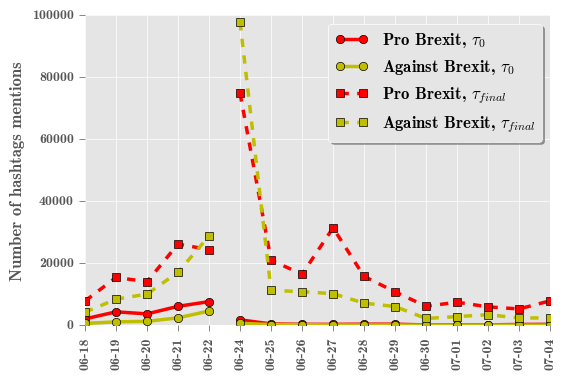

In [379]:
variableNames_seed = set(hashtagsDict.values())
# variableNames_pre_final = set(pre_hashtagsDict.values()) 
# variableNames_post_final = set(post_hashtagsDict.values())

# plotLinesRedYellow4Lines(seed_pre_dailyMentionDict, variableNames_seed, final_pre_dailyMentionDict, variableNames_pre_final, "/home/muntean/brexit-enriched/plots/hashtags_final_seed_pre.pdf")
# plotLinesRedYellow4Lines(seed_post_dailyMentionDict, variableNames_seed, final_post_dailyMentionDict, variableNames_post_final, "/home/muntean/brexit-enriched/plots/hashtags_final_seed_post.pdf")

seed_dest = seed_pre_dailyMentionDict.copy()
seed_dest.update(seed_post_dailyMentionDict)
final_dest = final_pre_dailyMentionDict.copy()
final_dest.update(final_post_dailyMentionDict)
plotLinesRedYellow4Lines(seed_dest, variableNames_seed, final_dest, set(all_hashtagsDict.values()), "/home/muntean/brexit-enriched/plots/hashtags_final_seed_all_with_gap.pdf")

In [404]:
#### POLITICAL PARTY

#### top parties pre and post
pre_dailyMentionDict = mentionsPerDay(pre_dailyTweetsDict, pre_tweetIndex, parties_mentions, parties_synonims)
print pre_dailyMentionDict.keys()
print pre_dailyMentionDict

post_dailyMentionDict = mentionsPerDay(post_dailyTweetsDict, post_tweetIndex, parties_mentions, parties_synonims)
print post_dailyMentionDict.keys()
print post_dailyMentionDict


[20160618, 20160619, 20160620, 20160621, 20160622]
OrderedDict([(20160618, [('Conservative Party', 900), ('Green Party', 33), ('Labour Party', 985), ('Liberal Democrats', 7), ('SNP', 41), ('UKIP', 395), ('Union Party', 14)]), (20160619, [('Conservative Party', 1444), ('Green Party', 39), ('Labour Party', 1044), ('Liberal Democrats', 7), ('Plaid Cymru', 2), ('SNP', 83), ('Sinn Fein', 2), ('UKIP', 490), ('Union Party', 28)]), (20160620, [('Conservative Party', 1605), ('Green Party', 37), ('Labour Party', 1490), ('Liberal Democrats', 8), ('SNP', 83), ('Sinn Fein', 3), ('UKIP', 520), ('Union Party', 9)]), (20160621, [('Conservative Party', 2275), ('Green Party', 50), ('Labour Party', 1892), ('Liberal Democrats', 10), ('SNP', 161), ('Sinn Fein', 3), ('UKIP', 605), ('Union Party', 16)]), (20160622, [('Conservative Party', 2194), ('Green Party', 67), ('Labour Party', 3315), ('Liberal Democrats', 12), ('Plaid Cymru', 3), ('SNP', 134), ('Sinn Fein', 5), ('UKIP', 812), ('Union Party', 20)])])
[2

In [406]:
# ### POLITICIANS

# ### top politicians pre and post: politician_ht or politicians
# pre_dailyMentionDict = mentionsPerDay(pre_dailyTweetsDict, pre_tweetIndex, politician_ht, politician_synonims)
# print pre_dailyMentionDict.keys()
# print pre_dailyMentionDict
# # print pre_dailyMentionDict[20160619]
# # print pre_dailyMentionDict[20160620]

# post_dailyMentionDict = mentionsPerDay(post_dailyTweetsDict, post_tweetIndex, politician_ht, politician_synonims)
# print post_dailyMentionDict.keys()
# print post_dailyMentionDict
# # print post_dailyMentionDict[20160624]
# # print post_dailyMentionDict[20160629]


# ### top politicians pre and post: politician_mentions
# pre_dailyMentionDict = mentionsPerDay(pre_dailyTweetsDict, pre_tweetIndex, politician_mentions, politician_synonims)
# print pre_dailyMentionDict.keys()
# print pre_dailyMentionDict

# post_dailyMentionDict = mentionsPerDay(post_dailyTweetsDict, post_tweetIndex, politician_mentions, politician_synonims)
# print post_dailyMentionDict.keys()
# print post_dailyMentionDict


### top politicians pre and post: politician MIXED hashtag and mentions
all_politicians = politician_synonims.keys()
pre_dailyMentionDict = mentionsPerDay(pre_dailyTweetsDict, pre_tweetIndex, all_politicians, politician_synonims)
print pre_dailyMentionDict.keys()
print pre_dailyMentionDict

post_dailyMentionDict = mentionsPerDay(post_dailyTweetsDict, post_tweetIndex, all_politicians, politician_synonims)
print post_dailyMentionDict.keys()
print post_dailyMentionDict


[20160618, 20160619, 20160620, 20160621, 20160622]
OrderedDict([(20160618, [('B. Johnson', 1291), ('D. Cameron', 1336), ('J. Corbyn', 419), ('J. Cox', 2088), ('N. Farage', 1247), ('N. Sturgeon', 47), ('T. May', 7)]), (20160619, [('B. Johnson', 3282), ('D. Cameron', 4920), ('J. Corbyn', 1799), ('J. Cox', 1340), ('N. Farage', 2357), ('N. Sturgeon', 233), ('T. May', 6)]), (20160620, [('B. Johnson', 2659), ('D. Cameron', 2508), ('J. Corbyn', 2138), ('J. Cox', 1755), ('N. Farage', 2655), ('N. Sturgeon', 296), ('T. May', 1)]), (20160621, [('B. Johnson', 8141), ('D. Cameron', 3311), ('J. Corbyn', 1258), ('J. Cox', 837), ('N. Farage', 1781), ('N. Sturgeon', 152), ('T. May', 13)]), (20160622, [('B. Johnson', 5641), ('D. Cameron', 3910), ('J. Corbyn', 1707), ('J. Cox', 939), ('N. Farage', 2717), ('N. Sturgeon', 143), ('T. May', 7)])])
[20160624, 20160625, 20160626, 20160627, 20160628, 20160629, 20160630, 20160701, 20160702, 20160703, 20160704]
OrderedDict([(20160624, [('B. Johnson', 30818), ('D.

In [ ]:
# variableNames = set(pre_hashtagsDict.values())
# plotLines(pre_dailyMentionDict, variableNames, "/home/muntean/brexit-enriched/plots/hashtags_pre.pdf")

[ 88  54  65  27 220 125  15  16  24  16  21]
[ 8944  4084 15312 11576 10464  9790  4305  4057  3851  3651  3648]
[1885  738  885  562  987  617  231  419  382  350 3390]
[12726  3415  5937  7101  5230  4190  5440  3885  2869  2983  3444]
[121 141 427 155 149 102  85  76  54  30  53]
[137  88  81  94 117 149  54  27  45  15  40]
[ 1  4  3 13  1 16  9  2  2  1  6]
[1464  519  712  587  650  489  184  141  187  179  173]
[911  21  11   9  18   3   2   1   2   0   1]


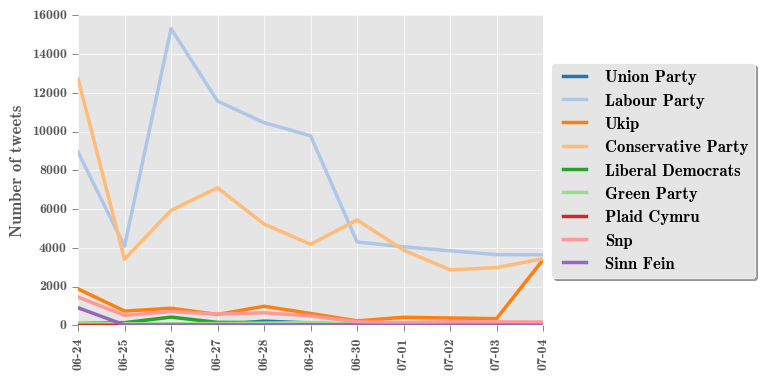

In [284]:
# plotLines(post_dailyMentionDict, variableNames, "/home/muntean/brexit-enriched/plots/parties_mentions_post.pdf")

set(['Union Party', 'Labour Party', 'UKIP', 'Conservative Party', 'Liberal Democrats', 'Green Party', 'Plaid Cymru', 'SNP', 'Sinn Fein'])
[ 14  28   9  16  20  88  54  65  27 220 125  15  16  24  16  21]
[  985  1044  1490  1892  3315  8951  4087 15323 11587 10469  9799  4307
  4063  3851  3653  3652]
[ 395  490  520  605  812 1889  741  886  565 1003  621  231  422  384  352
 3411]
[  900  1444  1605  2275  2194 12727  3416  5945  7106  5232  4203  5446
  3894  2871  2989  3445]
[  7   7   8  10  12 121 141 427 155 149 102  85  76  54  30  53]
[ 33  39  37  50  67 137  88  81  94 117 149  54  27  45  15  40]
[ 0  2  0  0  3  1  4  3 13  1 16  9  2  2  1  6]
[  41   83   83  161  134 1475  523  717  587  652  492  184  142  189  181
  173]
[  0   2   3   3   5 911  21  11   9  18   3   2   1   2   0   1]


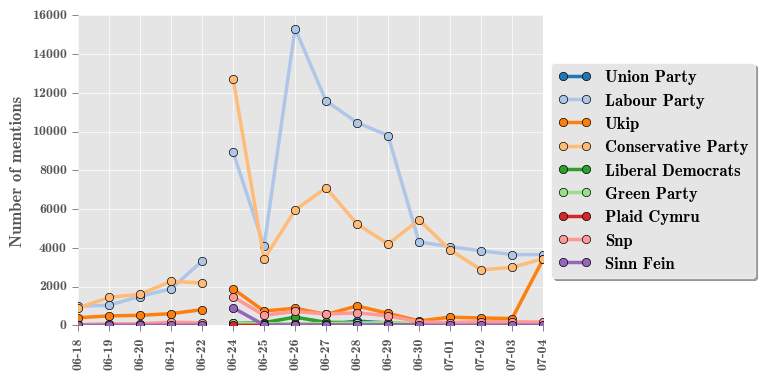

In [405]:
variableNames = set(parties_synonims.values())
print variableNames
dest = pre_dailyMentionDict.copy()
dest.update(post_dailyMentionDict)
plotLinesWithGap(dest, variableNames, "/home/muntean/brexit-enriched/plots/parties_mentions_all_with_gap.pdf")

set(['B. Johnson', 'J. Corbyn', 'D. Cameron', 'N. Sturgeon', 'T. May', 'J. Cox', 'N. Farage'])
[ 1291  3282  2659  8141  5641 30818  8680 11906 14897  7640  7033 24289
  6088  2764  2155  7861]
[  419  1799  2138  1258  1707 14050  6777 21019 25211 18728 19916  7812
  8229  8970  6797  6710]
[ 1336  4920  2508  3311  3910 43369  4349  4007  4980  2703  4382  1538
  1116   816   807  2146]
[  47  233  296  152  143 6005 1807 5027 1765 1430 1931  494  309  362  325
  208]
[   7    6    1   13    7  127  114  120   86  190  182 1096  757  482  778
  428]
[2088 1340 1755  837  939  937  448  271  190  225  179   88   53   51   42
   50]
[ 1247  2357  2655  1781  2717 34783  4964  2640  1769  9328  3240   776
  1111   817  1247 15311]


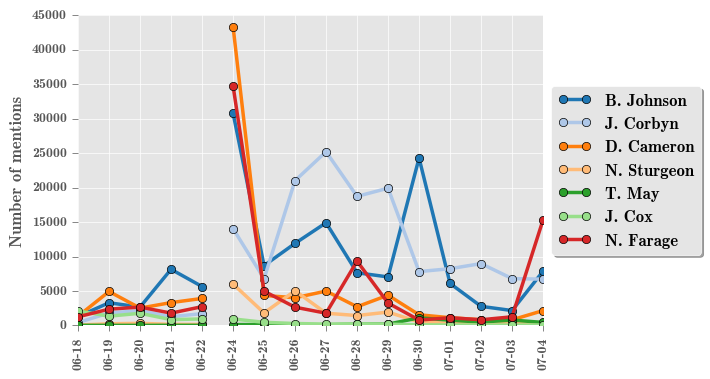

In [407]:
variableNames = set(politician_synonims.values())
print variableNames
dest = pre_dailyMentionDict.copy()
dest.update(post_dailyMentionDict)
plotLinesWithGap(dest, variableNames, "/home/muntean/brexit-enriched/plots/politicians_mixed_all_with_gap.pdf")

## mentions and sentiments

In [473]:
### we can plot UK vs NonUK users, with sentiment per day
### instead of country we use 2 states: uk vs non-uk

def buildCountrySentiIndexUser(filename):
    """
    The structure is a dictionary < location : dictionary <date, [list of sentiments - repeating e.g. 0,1,1,0,1 ...]> >
    :param filename:
    :param location_field_name:
    :return:
    """
    countryIndex = defaultdict(lambda : defaultdict(list))
    tweetsAsDict = tweetIter(filename)
    i = 0
    for tweet in tweetsAsDict:
        i += 1
        
        ### UK vs NON UK
#         if tweet["final_location_c"] and "sentiment_user" in tweet:
#             if tweet["final_location_c"] == "GB":
#                 country = "UK"  # this is a string not a list
#             else:
#                 country = "NonUK"
#             day = tweet["day"]
#             sentiment = tweet["sentiment_user"]
#             countryIndex[country][day].append(sentiment)  # this is already 0 o 1
        
        ## LABOUR vs CONSERVATIVES (tories) vs UKIP
        
        if "sentiment_user" in tweet:
            hasPartyMention = 0
            for party in parties_synonims.keys():
                if party in tweet["text"]:
                    day = tweet["day"]
                    sentiment = tweet["sentiment_user"]
                    countryIndex[parties_synonims[party]][day].append(sentiment)
        
#         ### Politicians
        
#         if "sentiment_user" in tweet:
#             hasPoliMention = 0
#             for politician in politician_synonims.keys():
#                 if politician in tweet["text"]:
#                     day = tweet["day"]
#                     sentiment = tweet["sentiment_user"]
#                     countryIndex[politician_synonims[politician]][day].append(sentiment)
# #                     break  ## see how numbers change; this awards the first mention!!

    return countryIndex

In [474]:
pre_countrySentiIndex = buildCountrySentiIndexUser(filename_pre)

In [475]:
print pre_countrySentiIndex.keys()

['B. Johnson', 'J. Corbyn', 'D. Cameron', 'N. Sturgeon', 'J. Cox', 'N. Farage']


In [476]:
post_countrySentiIndex = buildCountrySentiIndexUser(filename_post)

In [477]:
print post_countrySentiIndex.keys()

['B. Johnson', 'J. Corbyn', 'D. Cameron', 'N. Sturgeon', 'T. May', 'J. Cox', 'N. Farage']


[8, 11, 3, 14, 17, 178, 15, 11, 15, 5, 27, 7, 5, 9, 4, 4] [17, 56, 21, 34, 34, 376, 43, 33, 22, 17, 46, 10, 14, 9, 4, 7]


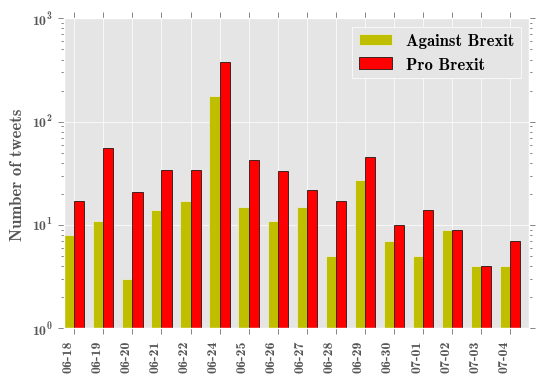

[18, 32, 150, 169, 604, 1195, 783, 1173, 2306, 1621, 1623, 586, 652, 784, 585, 597] [21, 194, 264, 172, 155, 279, 205, 338, 432, 370, 321, 126, 106, 115, 109, 144]


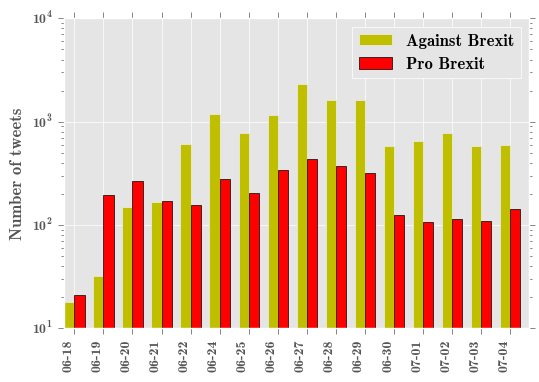

[8, 20, 19, 9, 18, 305, 23, 10, 9, 18, 7, 1, 2, 3, 4, 53] [5, 9, 9, 12, 12, 149, 26, 41, 26, 66, 67, 5, 8, 13, 4, 105]


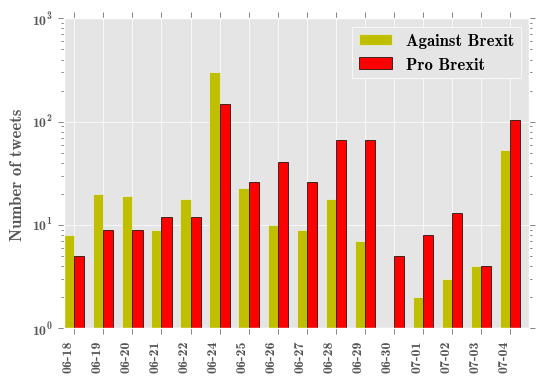

[8, 12, 17, 57, 24, 244, 23, 22, 26, 19, 20, 59, 7, 5, 2, 17] [24, 26, 40, 81, 71, 173, 77, 92, 103, 92, 78, 139, 43, 39, 42, 89]


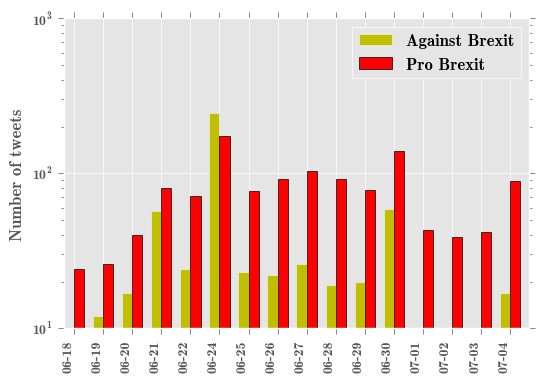

In [478]:
def plotCountrySentimentPerDay(dailySentiDict, countryName, days): #, generic_title):
    labels = list()
    against = list()
    pro = list()

    ### merge the 2 dicts
    dailySentiDictSorted = sorted(dailySentiDict.iteritems(), key=lambda x: x[0])  # order by date
    for record in dailySentiDictSorted:
        day = record[0]
        if day in days:
            sentiList = record[1]
            labels.append(day)
            count_pro = sentiList.count(1)
            pro.append(count_pro)
            count_anti = sentiList.count(0)
            against.append(count_anti)
    new_labels = [str(x)[4:6]+"-"+str(x)[6:] for x in labels]
    print against, pro
    plotBarWithLables2DistribSenti(against, pro, new_labels, countryName.capitalize() + "_sentiment_per_Day", rot=90)

# days_pre = pre_countrySentiIndex["UK"].keys()   
# days_post = post_countrySentiIndex["UK"].keys()

# plotCountrySentimentPerDay(pre_countrySentiIndex["UK"], "UK", days_pre)
# plotCountrySentimentPerDay(pre_countrySentiIndex["NonUK"], "Non UK", days_pre)

# plotCountrySentimentPerDay(post_countrySentiIndex["UK"], "UK_post", days_post)
# plotCountrySentimentPerDay(post_countrySentiIndex["NonUK"], "Non_UK_post", days_post)

# merge days
newDictUK = pre_countrySentiIndex["D. Cameron"].copy()
newDictUK.update(post_countrySentiIndex["D. Cameron"])
# print newDictUK
all_days = newDictUK.keys()
# print all_days
plotCountrySentimentPerDay(newDictUK, "D. Cameron", all_days)

newDictNonUK = pre_countrySentiIndex["J. Corbyn"].copy()
newDictNonUK.update(post_countrySentiIndex["J. Corbyn"])
plotCountrySentimentPerDay(newDictNonUK, "J. Corbyn", all_days)

newDictNonUK = pre_countrySentiIndex["N. Farage"].copy()
newDictNonUK.update(post_countrySentiIndex["N. Farage"])
plotCountrySentimentPerDay(newDictNonUK, "N. Farage", all_days)

newDictNonUK = pre_countrySentiIndex["B. Johnson"].copy()
newDictNonUK.update(post_countrySentiIndex["B. Johnson"])
plotCountrySentimentPerDay(newDictNonUK, "B. Johnson", all_days)